# Task overview
In this homework assignment, you will implement a simple Transformer architecture using only basic layers such as nn.Embedding, nn.Linear, ReLU, softmax, and einsum. This will be a decoder-only model (language model), trained on a toy problem. You will analyze the results of the baseline Transformer and results with some minor changes to its components.

# Dataset
The dataset has already been generated for you. It is an artificial and simple dataset that was designed to make training quick and debugging easy. Each example in the dataset consists of a sequence of tokens, with each token represented by a number from 0 to 9. The length of each sequence is 64 tokens. Each and every sequence starts with token 0 (zero).

This is a language modeling task, which means that your model's task is to predict the next token in the sequence. Specifically, for each prefix of the input sequence, your model will generate a prediction for the token that should follow.

The dataset was generated in a particular way, but you don't need to know the details in order to complete the homework assignment. These details are provided in the code that generates the dataset. However, as an overview, we can see some patterns emerging in the following example sequences:

* [0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 4, 2, 3, 4, 2, 3, 7, 8, 6, 7, 8, 6, 9, 4, ...]
  * In this example, 0 seems to always be followed by 1.
* [0, 4, 9, 7, 8, 9, 0, 4, 5, 2, 8, 5, 2, 8, 5, 2, 3, 4, 5, 2, 8, 9, 0, 4, ...]
  * Here, however, 0 is followed by 4.
* [0, 1, 2, 3, 4, 5, 3, 4, 7, 8, 0, 1, 2, 5, 3, 4, 7, 8, 0, 1, 6, 9, 2, 5, ...]
  * In every example we can see that the number N is often followed by N+1.


Each example is constructed with random patterns. In order to accurately predict the next token, your model will need to learn these patterns "on the fly" as it processes each example. This is called "in-context learning," where the model learns how to figure out the pattern instead of learning the pattern during training.

# Model implementation (60% points)
For this homework assignment, you will be implementing a version of the Transformer architecture with only the decoder, also known as a language model. Models from GPT family, like ChatGPT, are similar to what you will be implementing. In fact, ChatGPT even helped improve the readability and quality of writing in this homework assignment. A Transformer is helping to teach Transformers!

You can read the original paper introducing the Transformer for more details: https://arxiv.org/pdf/1706.03762.pdf.

Your model will consist of the following components:

* Learnable, randomly initialized embeddings (using nn.Embedding)
* Positional encoding
* A number of decoding blocks, each consisting of:
  * Multi-head attention (wrapped in a residual connection)
  * Feed-forward layer (wrapped in a residual connection)
* A linear layer to get the output probabilities

The general structure is already provided in the code. You will need to implement the following classes and functions:

* get_positional_encoding
* Attention
* FeedForward
* DecoderBlock

The DecoderModel has already been implemented, but you are welcome to change it if necessary for visualizations, etc. In general, you are free to change any part of the provided code if it makes it easier for you to implement something. 

# Model training (10% points)
The training loop has already been implemented, and it is up to you to decide on the model and learning parameters to use. The default values should be sufficient for achieving the expected accuracy.

Your model should be able to achieve 70% accuracy on the test set, with accuracy defined as the percentage of next tokens predicted correctly given the prefix. This is a token-level accuracy, not a sequence-level accuracy.

After training your model, you should briefly discuss the training and achieved accuracy compared to your expectations. Print and analyze probabilities given by your model - what thing the model learn? How efficient is it?

# Experiments (10% points)
To complete this part of the homework assignment, you will need to test additional models with a different number of DecoderBlocks. Specifically, you should test and report accuracy for 0, 1, 2, 3, maybe 4 DecoderBlocks.

After that, you should train models again with a variable number of blocks, but this time without positional encoding added to the embedding. You should observe that the model requires more layers to achieve the expected accuracy, but it is still able to do so.

# Text generation (20% points)

There are two methods for generating next token probabilities:
* The inefficient method involves running the model with each prefix, predicting the next token, adding it to the prefix, and then running the whole model again. Note that this method may result in a 10% reduction in points.
* The efficient method involves storing (caching) the K and V vectors used in the Attention layer, so that you can pass a single token to get the next one, instead of processing the whole prefix again.

Next, test and compare two sampling methods: argmax (taking, as the next token, the most likely token) and sampling from a distribution returned by the model. Generate a few sentences with those methods. How quickly a model can spot a pattern?

[Alternatively, you can also implement temperature sampling, which allows you to smoothly interpolate between argmax, sampling from a given distribution, and sampling from a uniform distribution.]

# Optional attention visualizations (0% points, but 100% cool)

To better understand how the Transformer model is making its predictions, you can visualize the attention weights in different layers. This will allow you to see which tokens the model is actually paying attention to when making its predictions.

It may be helpful to compare the attention weights in a 1-layer Transformer to those in a 2-layer Transformer to understand why a 1-layer Transformer may not be able to do in-context learning while a 2-layer Transformer can. You can also refer to the following resource for a more in-depth analysis: https://transformer-circuits.pub/2021/framework/index.html .

# Tips and tricks
* It is recommended that you read the original Transformer paper ("Attention is All You Need") at https://arxiv.org/pdf/1706.03762.pdf, as well as the illustrated blog post on the Transformer at http://jalammar.github.io/illustrated-transformer/ .
* All models should train very quickly, especially if you are using a GPU accelerator on colab.research.google.com . Your model should be able to reach 70% accuracy in less than 3 minutes.
* When implementing multi-head attention:
  * It can be helpful to use torch.einsum. You can find examples in the numpy documentation at https://numpy.org/doc/stable/reference/generated/numpy.einsum.html, specifically looking at "Tensor contraction." This can help reduce the number of reshapes, permutations, and transpositions needed for matrix multiplications and make it easier to compute the attention matrix.
  * Use the correct causal mask. Specifically, each "token" should only attend  to itself and previous tokens.
* You can also consider implementing separate (parameterless) functions for split_heads and merge_heads that take a tensor and number of heads as input.
* When implementing positional encoding, you can use "sin" on even dimensions and "cos" on odd dimensions, as described in the original paper. Alternatively, you can generate "sin" and "cos" separately and concatenate them. Both methods work equally well, and concatenation is generally easier to implement. You can refer to the "Illustrated Transformer" blog post for examples of both methods.
* If you are having trouble with any part of the implementation, it can be helpful to check the output of each module separately and the output predictions of your model to identify any issues.
* In the original Transformer paper, the LayerNorm layer is placed on the residual stream, after the Attention or FeedForward layer. However, it may be more effective to place the LayerNorm layer in front of the Attention or FeedForward layer, as this can help stabilize the training process and improve the model's performance. This approach has been used in some subsequent transformer-based models and has been found to be effective. It is possible that the placement of the LayerNorm layer in the original paper was simply a mistake and the code used actually placed the LayerNorm right before the FeedForward/Attention layers, where it should be.

# Simplifications
If you find certain parts of the task to be too difficult, you can try simplifying the task in one of the following ways. Keep in mind that your score may be reduced as a result, but this can help you proceed with the experiments and potentially identify any bugs in your code.

* If you are having trouble training the model, you can try generating a dataset with fewer tokens and a smaller sequence length. This may make it easier to identify and fix any issues with your code or to tune the hyperparameters of the model.
* If you are having difficulty implementing the positional encoding, you could try implementing learnable positional encoding. This involves adding an additional nn.Embedding layer that takes the position of the token (rather than the token itself) as input and returns an embedding for that particular position.
* If you are struggling to implement the multi-head attention, you might try implementing just a single head attention without any splitting and concatenation. This can help you understand the method and make it easier to implement multi-head attention later.
* When implementing Attention, it may be beneficial to skip the implementation of caching at first. You can train and evaluate the accuracy of the model without caching, and then add caching later to improve the efficiency of text generation (and your score).

## Picture below:
Below is a representation of the simplified model that you will be implementing. You may compare it with Figure 1 in the Attention is All You Need paper ( https://arxiv.org/pdf/1706.03762.pdf ).


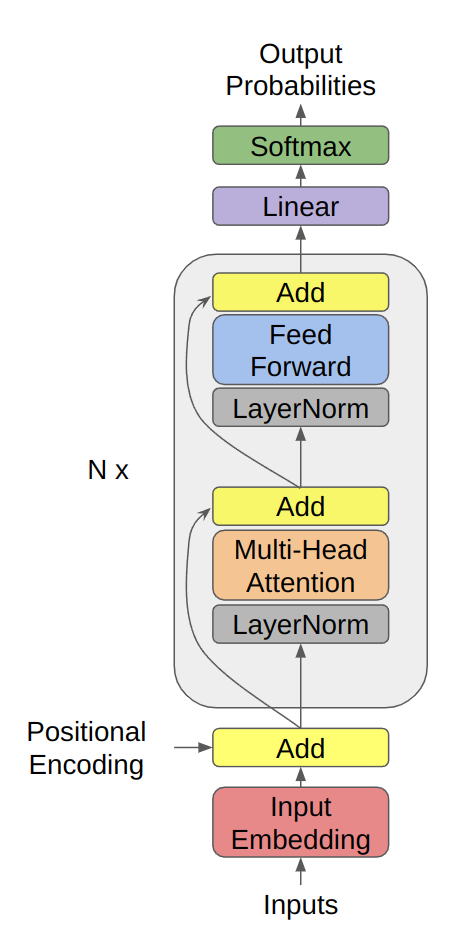

# Tools

In [1]:
# Basic imports
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

from collections import namedtuple

## Dataset generation
The tools below are responsible for generating the dataset. You should not modify them.

### Detailed dataset description
To generate each example, we first create a random Markov chain and sample a sequence of a given length starting at token zero. This Markov chain is specific to the current example.

To create the Markov chain, we follow this algorithm:
1. Generate a random permutation of the numbers P(x) - a bijection that maps each token in the vocabulary to another token.
2. Create a function INC(x) that maps the x-th token to the ((x+1)%N)-th token.
3. For each i-th token (node), create an outgoing edge to P(i) with probability 80% and to INC(i) with probability 20%.

This dataset design ensures that the sequences will be mostly predictable, but not completely. It also introduces learnable concepts that are both dataset-wide (due to the constant INC function) and sample-specific (due to the random P function).

In [2]:
# parameters for dataset generation. If you want to, you can change batch size, but there should be no reason to.
BATCH_SIZE = 128
SEQ_LEN = 64
VOCAB_SIZE = 10

In [3]:
import string

Edge = namedtuple("Edge", "to token prob")

In [4]:
def generate_random(size):
    """
    For generating a random sequence of elements.
    """
    prob = 1.0/size
    graph = {0: [Edge(to=0, token=a, prob=prob) for a in range(size)]}
    return graph

In [5]:
def generate_pseudo_permutation(size, true_prob=1.0):
    assert 0 < size
    assert 0 < true_prob <= 1.0
    permutation = np.random.permutation(size)
    graph = {}
    for v in range(size):
        e1 = Edge(to=(v+1) % size, token=v, prob=1. - true_prob)
        e2 = Edge(to=permutation[v], token=v, prob=true_prob)
        graph[v] = [e1, e2]
    return graph

In [6]:
class SeqGen:
    """
    For generating sequences based on a given Markov chain.
    Markov chain is represented as a directed graph with edges 
    labeled with probabilities and tokens to output
    (dictionary mapping vertex->Edge).
    Assumes that the starting vertex is 0.
    """
    def __init__(self, graph):
        self.graph = graph
        self.current = 0 # we will always start with 0

    def __iter__(self):
        return self

    def __next__(self):
        options = self.graph[self.current]
        probs = list(map(lambda x: x.prob, options))
        choice = np.random.choice(
            list(range(len(options))), size=1, p=probs)[0]
        self.current = options[choice].to
        return options[choice].token

In [7]:
def generate_dataset(gen_factory, seq_len, num_entries):
    """
    For generating datasets with num_entries elements each
    of length seq_len.

      gen_factory is a procedure that returns 
        instance of SeqGen when called.

      seq_len is the length of the sequence to generate.
      
      num_entries is the number of sequences to generate.
    """
    entries = []
    for e in range(num_entries):
        seq_gen = gen_factory()
        seq = []
        for s in range(seq_len + 1):
            seq.append(next(seq_gen))
        entries.append(seq)
    data = torch.tensor(entries, dtype=torch.long)
    x = data[:, :seq_len]
    y = data[:, 1:]       # we predict next token
    return torch.utils.data.TensorDataset(x, y)

In [8]:
def example_generator(gen):
    """
      gen is a procedure that returns a graph describing
      a Markov chain when called.
    """
    def example_gen():
        return SeqGen(gen())
    return example_gen

In [9]:
PERM_EXAMPLE_GENERATOR = example_generator(lambda: generate_pseudo_permutation(
            VOCAB_SIZE, true_prob=0.8))

RANDOM_EXAMPLE_GENERATOR = example_generator(lambda: generate_random(
            VOCAB_SIZE))


TRAIN_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=10000)
TEST_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=1000)

TRAIN_LOADER = torch.utils.data.DataLoader(
    TRAIN_DATASET, batch_size=BATCH_SIZE)
TEST_LOADER = torch.utils.data.DataLoader(TEST_DATASET, batch_size=BATCH_SIZE)

RANDOM_TRAIN_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TEST_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TRAIN_LOADER = torch.utils.data.DataLoader(
    RANDOM_TRAIN_DATASET, batch_size=BATCH_SIZE)

RANDOM_TEST_LOADER = torch.utils.data.DataLoader(
    RANDOM_TEST_DATASET, batch_size=BATCH_SIZE)



## Data visualization

In [10]:
for index, x in enumerate(TRAIN_LOADER):
  print(x[0][0])
  if index >= 10:
    break

tensor([0, 7, 8, 6, 0, 7, 8, 6, 0, 1, 2, 5, 4, 9, 1, 2, 5, 4, 9, 1, 2, 5, 4, 9,
        1, 2, 5, 4, 9, 1, 2, 5, 4, 9, 1, 2, 5, 4, 9, 1, 2, 5, 6, 0, 7, 8, 9, 0,
        7, 8, 6, 0, 7, 8, 9, 1, 2, 5, 4, 9, 1, 2, 5, 4])
tensor([0, 4, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 0, 4, 5, 3, 4, 9, 8, 0, 4, 9, 8,
        0, 1, 2, 3, 7, 6, 1, 2, 5, 6, 1, 2, 5, 3, 4, 9, 8, 0, 4, 9, 8, 0, 4, 9,
        8, 0, 4, 9, 8, 0, 4, 9, 8, 0, 4, 5, 3, 7, 6, 1])
tensor([0, 9, 1, 3, 4, 5, 0, 9, 1, 3, 4, 5, 6, 7, 2, 6, 8, 7, 2, 3, 4, 5, 6, 8,
        7, 2, 3, 4, 5, 6, 8, 9, 1, 3, 4, 5, 0, 9, 1, 3, 4, 5, 0, 9, 0, 9, 1, 3,
        4, 5, 6, 8, 9, 0, 9, 1, 3, 4, 5, 0, 1, 3, 4, 5])
tensor([0, 8, 5, 4, 3, 4, 3, 4, 3, 1, 7, 9, 2, 6, 0, 1, 7, 8, 5, 4, 3, 1, 7, 9,
        0, 8, 5, 4, 5, 6, 7, 9, 2, 6, 7, 8, 5, 4, 3, 1, 7, 8, 5, 4, 3, 1, 7, 9,
        2, 3, 1, 7, 9, 2, 6, 0, 8, 5, 4, 3, 1, 2, 6, 0])
tensor([0, 0, 0, 0, 1, 2, 8, 7, 1, 2, 8, 9, 5, 6, 3, 4, 9, 5, 6, 3, 4, 9, 0, 0,
        0, 0, 1, 2, 8, 7, 1, 2, 3, 4, 9, 5, 6, 3, 4,

In [11]:
import networkx as nx

def plot_graph(graph):
    """
    Draws the graph that describes a Markov chain.
    """
    edg_list = []
    edg_labels = {}
    for v, out_edg in graph.items():
        for edg in out_edg:
            t = (v, edg.to)
            tr = (edg.to, v)
            text = f"{v}→{edg.to} = {edg.prob:.2f}"
            if t in edg_labels:
                edg_labels[t] += "\n" + text
            elif tr in edg_labels:
                edg_labels[tr] += "\n" + text
            else:
                edg_labels[t] = text
            edg_list.append(t)
    G = nx.DiGraph(directed=True)
    G.add_edges_from(edg_list)
    pos = nx.nx_pydot.graphviz_layout(G)
    fig = plt.figure(1, figsize=(300, 120), dpi=30)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edg_labels, font_size=120)
    nx.draw_networkx(G, pos, node_size=50000, arrows=True, arrowsize=200)
    nx.draw_networkx_labels(G, pos, font_size=120)

Below you can find some visualizations of the data.

[0, 7, 0, 7, 8, 8, 8, 8, 8, 8, 8, 9, 1, 2, 3, 2, 3, 2, 3, 2, 3, 4, 5, 6, 7, 0, 1, 9, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 5, 6, 4, 5, 6, 7, 0, 1]


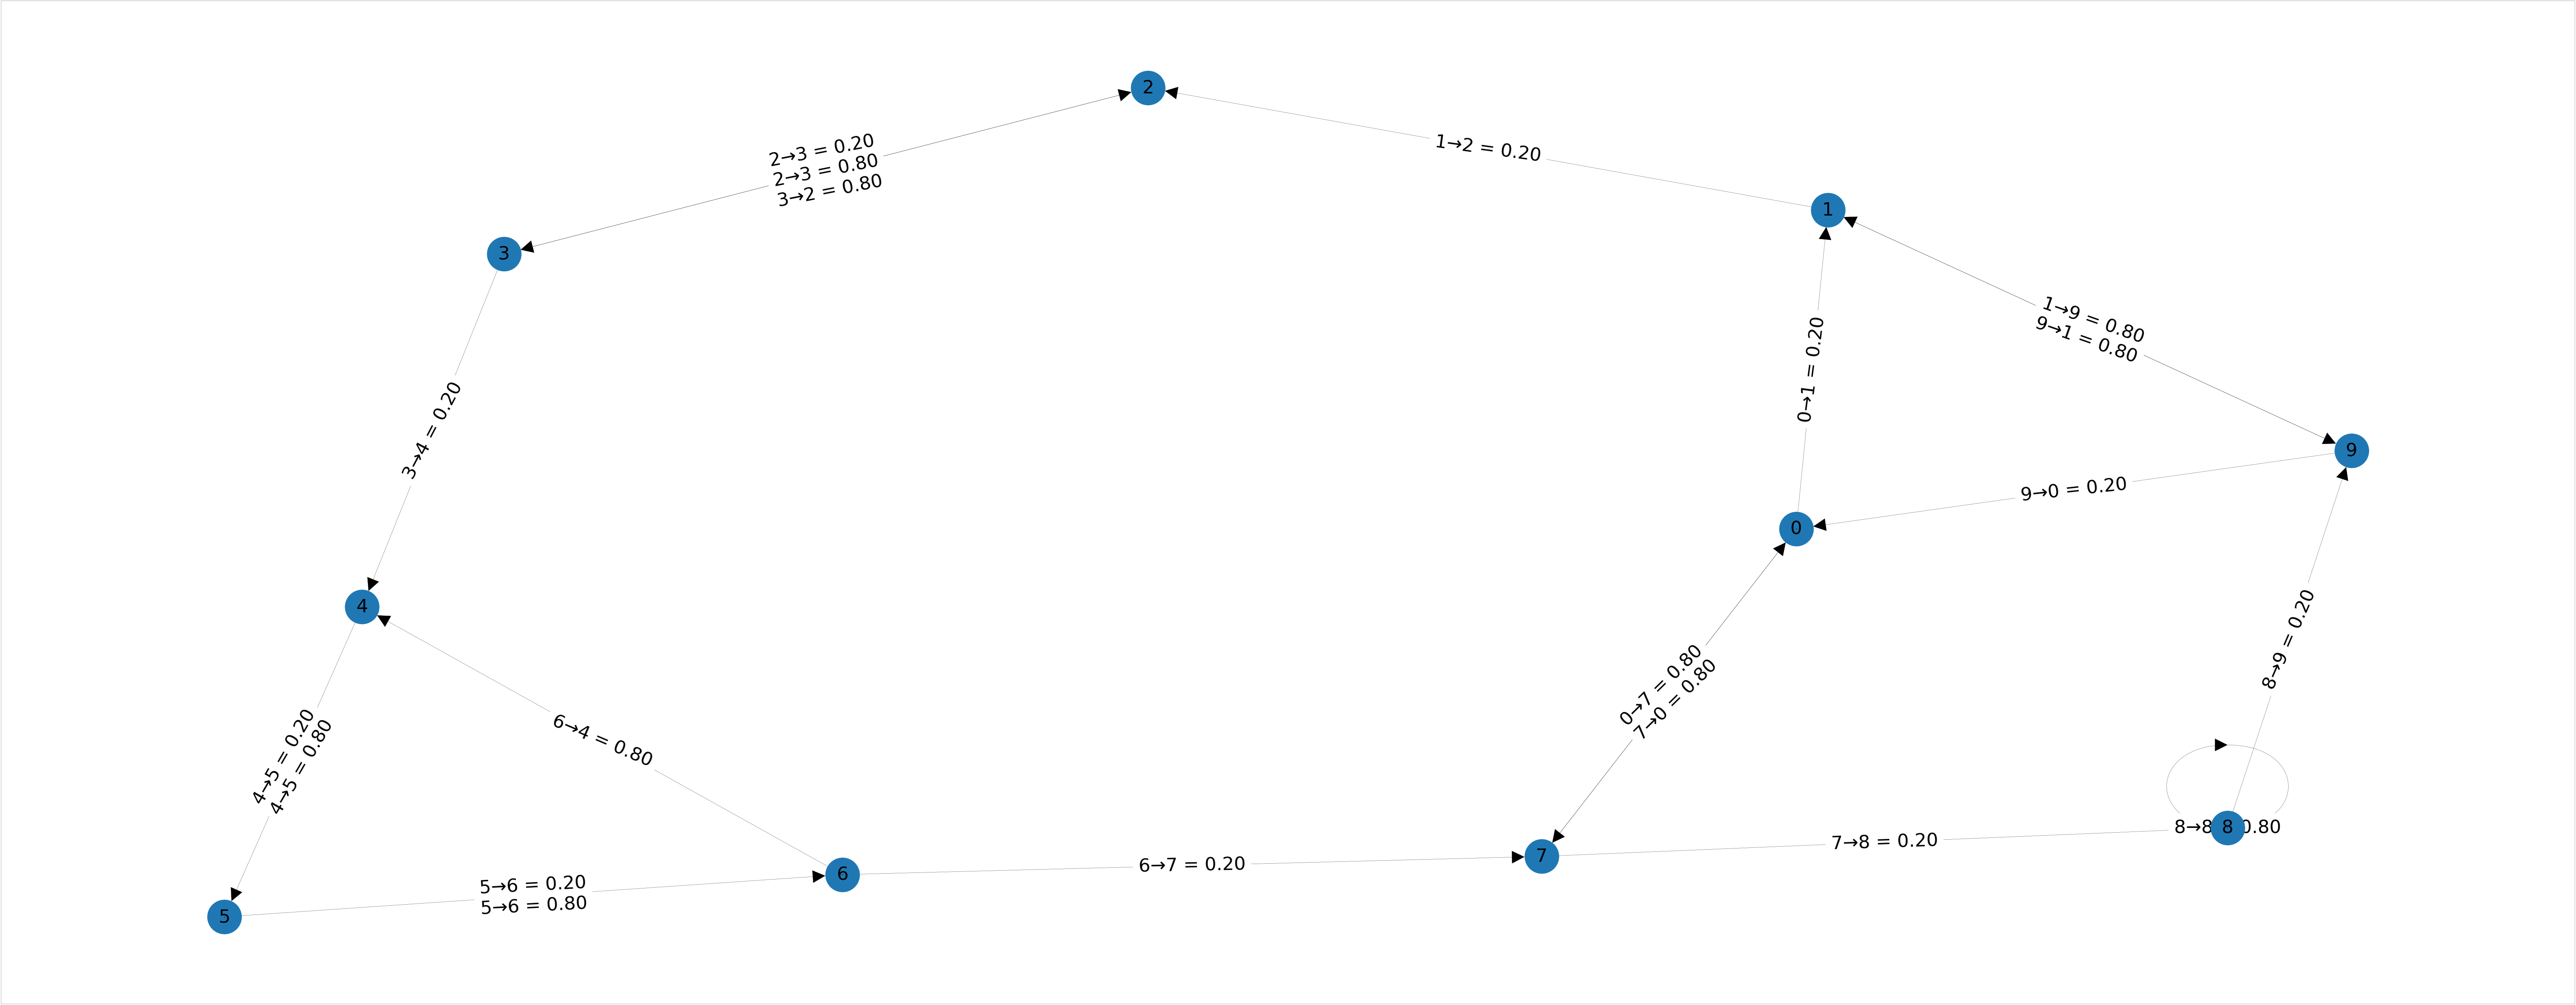

In [12]:
graph = generate_pseudo_permutation(10, true_prob=0.8)
plot_graph(graph)
data = [x for i, x in zip(range(SEQ_LEN), SeqGen(graph))]
print(data)

# Main part

In [13]:
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print("Ok we have cuda capable device")
else:
    DEVICE = torch.device("cpu")
    print("No cuda capable device. If you are running the code in Colab, you can enable a GPU by going to Runtime -> Change runtime type -> GPU.")
    print(" If you are running the code locally, you may need to install additional drivers and libraries, such as cuDNN, to enable GPU support.")


Ok we have cuda capable device


Before implementing the Transformer part of the model, you may (but don't have to) revisit the implementation of the softmax function. This can help you with the efficient implementation of the causal mask later on. 

In [14]:
def stable_softmax(x, dim):
    x_max = torch.max(x, dim=dim, keepdim=True)[0]
    x_exp = torch.exp(x - x_max)
    return x_exp / torch.sum(x_exp, dim=dim, keepdim=True)


test_input = torch.arange(128, dtype=torch.float).reshape(2, 4, 16)
assert torch.isclose(stable_softmax(test_input + 10.0**4, dim=-1),
                     stable_softmax(test_input, dim=-1)).all()
assert torch.isclose(stable_softmax(test_input, dim=-1),
                     torch.nn.functional.softmax(test_input, dim=-1)).all()
assert torch.isclose(stable_softmax(test_input, dim=-2),
                     torch.nn.functional.softmax(test_input, dim=-2)).all()
assert torch.isclose(stable_softmax(test_input, dim=0),
                     torch.nn.functional.softmax(test_input, dim=0)).all()

## The architecture

Implement a module that performs Multi-Head Attention. For text generation, the module should be able to cache calculated keys and values. The cache should be indifferentiable (don't forget `.detach()`). Remember to use the causal mask to ensure that elements can only see themselves and elements that precede them.

In [15]:
import math

MHACache = namedtuple("MHACache", "k v")


class MultiHeadAttention(torch.nn.Module):
    def __init__(self, d_model, num_heads, d_head):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_head = d_head

        self.query_model = torch.nn.Linear(d_model, num_heads * d_head)
        torch.nn.init.xavier_uniform_(self.query_model.weight)

        self.key_model = torch.nn.Linear(d_model, num_heads * d_head)
        torch.nn.init.xavier_uniform_(self.key_model.weight)

        self.value_model = torch.nn.Linear(d_model, num_heads * d_head)
        torch.nn.init.xavier_uniform_(self.value_model.weight)

        self.final_linear = torch.nn.Linear(num_heads * d_head, d_model)
        torch.nn.init.xavier_uniform_(self.final_linear.weight)

    def get_empty_cache(self, batch_size):
        return MHACache(k=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE),
                        v=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE))

    def forward(self, x, cache):

        """
          x input of shape (seq, batch_size, d_model).

          cache is a MHACache object consisting of keys and values
            of shape (seq', batch_size, head, d_head)

        Returns the result of the attention computation along with the updated
        cache. The attention is calculated separately for each head. The attention
        mechanism used is decoder-style, which means that an element can only
        attend to itself and elements that precede it (including elements in the
        cache). The new cache is created by extending the old cache with the new
        keys and values computed for each head of x.
        """
        assert len(x.shape) == 3  # seq, batch, d_model
        assert x.shape[-1] == self.d_model

        assert len(cache.k.shape) == 4  # seq', batch, head, d_head
        assert cache.k.shape == cache.v.shape
        assert cache.k.shape[1] == x.shape[1]
        assert cache.k.shape[2] == self.num_heads
        assert cache.k.shape[3] == self.d_head

        seq_size, batch_size, _ = x.shape
        seq_prime_size, _, _, _ = cache.k.shape

        queries = self.query_model(x)  # seq, batch, num_heads * d_head
        queries = queries.view(seq_size, batch_size, self.num_heads, self.d_head) # seq, batch, num_heads, d_head

        keys_from_cache = cache.k # seq', batch, num_heads, d_head
        keys_from_x = self.key_model(x)  # seq, batch, num_heads * d_head
        keys_from_x = keys_from_x.view(seq_size, batch_size, self.num_heads, self.d_head) # seq, batch, num_heads, d_head
        keys_all = torch.cat([keys_from_cache, keys_from_x], dim=0) # seq + seq', batch, num_heads, d_head

        attention_weights = torch.einsum("i...k,j...k->ij...", queries, keys_all) # seq, seq+seq', batch, num_heads
        attention_weights = attention_weights / math.sqrt(self.d_head) # seq, seq+seq', batch, num_heads
        # Index j, for which attention_weights[i, j, b, h] is maximal represents
        # The most interesting element in the sequence for word i, batch b and head h.

        # Masking
        # We assume the convention that attention_weights[i,j,:] is the weight when *i* looks at *j*.
        # We want to mask out all the weights that correspond to looking at the future.
        # That is, attention_weights[i,j,:] should be -inf (because it's before the softmax) for all j > i.

        #          _left         _right
        #
        #           seq'           seq
        #      0000 0000 0000 0000 -inf -inf
        # seq  0000 0000 0000 0000 0000 -inf
        #      0000 0000 0000 0000 0000 0000
        #
        attention_mask_left = torch.zeros(seq_size, seq_prime_size, device=DEVICE) # seq, seq'
        attention_mask_right = torch.triu(torch.full((seq_size, seq_size), float("-inf"), device=DEVICE), diagonal=1) # seq, seq
        attention_mask = torch.cat([attention_mask_left, attention_mask_right], dim=1) # seq, seq'+seq
        attention_mask = torch.unsqueeze(attention_mask, -1) # seq, seq'+seq, 1
        attention_mask = torch.unsqueeze(attention_mask, -1) # seq, seq'+seq, 1, 1
        attention_mask = attention_mask.expand(attention_weights.shape) # seq, seq'+seq, batch, num_heads

        attention_weights = attention_weights + attention_mask # seq, seq'+seq, batch, num_heads

        attention_weights = stable_softmax(attention_weights, dim=1) # seq, seq'+seq, batch, num_heads

        values_from_cache = cache.v
        values_from_x = self.value_model(x)  # seq, batch, num_heads * d_head
        values_from_x = values_from_x.view(seq_size, batch_size, self.num_heads, self.d_head) # seq, batch, num_heads, d_head
        values_all = torch.cat([values_from_cache, values_from_x], dim=0) # seq + seq', batch, num_heads, d_head

        res = torch.einsum("ij...,j...k->i...k", attention_weights, values_all) # seq, batch, num_heads, d_head
        res = res.reshape(seq_size, batch_size, self.num_heads * self.d_head) # seq, batch, num_heads * d_head
        res = self.final_linear(res) # seq, batch, d_model

        new_cache = MHACache(k=keys_all, v=values_all)

        assert res.shape == x.shape
        return res, new_cache, attention_weights

Implement a FeedForward layer (pay attention to the place where the activation function is used).

In [16]:
class FeedForward(torch.nn.Module):
    def __init__(self, d_model, d_ff):
        super().__init__()
        self.d_model = d_model
        self.d_ff = d_ff
        self.model = torch.nn.Sequential(
            torch.nn.Linear(d_model, d_ff),
            torch.nn.ReLU(),
            torch.nn.Linear(d_ff, d_model)
        )

    def forward(self, x):
        assert len(x.shape) == 3  # seq, batch, d_model
        assert x.shape[-1] == self.d_model

        x = self.model(x)

        assert len(x.shape) == 3  # seq, batch, d_model
        assert x.shape[-1] == self.d_model
        return x



Implement `DecoderLayer`: 
* use residual connections as in the image
* use `torch.nn.LayerNorm(d_model)`
* use `MultiHeadAttention` and `FeedForward` that you have implemented above

In [17]:
class DecoderLayer(torch.nn.Module):
    def __init__(self, d_model, d_ff, num_heads, d_head):
        super().__init__()
        self.norm_before_attention = torch.nn.LayerNorm(d_model)
        self.attention = MultiHeadAttention(d_model, num_heads, d_head)
        self.norm_and_ff = torch.nn.Sequential(
            torch.nn.LayerNorm(d_model),
            FeedForward(d_model, d_ff)
        )

    def get_empty_cache(self, batch_size):
        return self.attention.get_empty_cache(batch_size)

    def forward(self, x, cache):
        x = self.norm_before_attention(x)
        y, cache, attention_weights = self.attention(x, cache)
        x = torch.add(x, y)
        y = self.norm_and_ff(x)
        x = torch.add(x, y)
        return x, cache, attention_weights

Implement positional encoding.

In [18]:
def get_positional_encoding(seqlen, d_model):
    """
    Returns a matrix P of shape (seqlen, hiddendim) where
    P[i] should be added to the ith element of the input sequence
    as positional encoding.
    """

    def get_angles(pos, i, d_model):
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
        return pos * angle_rates

    angle_rads = get_angles(np.arange(seqlen)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    # output shape: (seqlen, hiddendim)
    return torch.tensor(pos_encoding, dtype=torch.float, device=DEVICE).squeeze(0)

Decoder is already implemented below.

In [19]:
class Decoder(torch.nn.Module):
    def __init__(self, vocab_size, d_model, d_ff, num_heads, d_head, num_layers):
        super().__init__()
        self.vocab_size = vocab_size
        self.d_model = d_model
        self.embedding = torch.nn.Embedding(vocab_size, d_model)
        self.dec_layers = torch.nn.ModuleList([
            DecoderLayer(d_model=d_model, d_ff=d_ff, num_heads=num_heads, d_head=d_head) for _ in range(num_layers)
        ])
        self.output_layer = torch.nn.Linear(
            d_model, vocab_size, bias=True)

    def get_empty_cache(self, batch_size):
        return [
            l.get_empty_cache(batch_size) for l in self.dec_layers
        ]

    def forward(self, x, cache, offset=0):
        assert len(x.shape) == 2  # seq, batch
        assert (x < self.vocab_size).all()
        assert len(self.dec_layers) == len(cache)

        x = self.embedding(x)
        if POSITIONAL:
            x = x + get_positional_encoding(x.shape[0] + offset, self.d_model)[offset:, None, :]

        new_cache = []
        all_attention_weights = []
        for l, c in zip(self.dec_layers, cache):
            x, nc, attention_weights = l(x, c)
            new_cache.append(nc)
            all_attention_weights.append(attention_weights)

        x = self.output_layer(x)

        return torch.distributions.Categorical(logits=x), new_cache, all_attention_weights


## Training and evaluation

Eval is already implemented, please note that the model expects the input of shape `(seq_len, batch)`.

In [20]:
def take_most_probable(dist):
    return torch.argmax(dist.logits.detach(), dim=-1)

def take_sample(dist):
  return dist.sample()


def eval(model, test_loader):
    model.eval()
    ti = iter(test_loader)

    total = 0
    total_correct = 0

    seq_size = next(iter(TEST_LOADER))[0].shape[1]
    per_position_correct = np.zeros(seq_size)
    per_position = 0

    for td in ti:
        x, y = td
        x = x.to(DEVICE).swapdims(0, 1)
        y = y.to(DEVICE).swapdims(0, 1)
        dist, cache, _ = model(x, model.get_empty_cache(x.shape[1]))

        model_ans = take_most_probable(dist)
        assert model_ans.shape == y.shape
        total_correct += (model_ans == y).sum().cpu().item()
        per_position_correct += (model_ans == y).sum(dim=1).cpu().detach().numpy()
        per_position += np.prod(y.shape[1:])
        total += np.prod(y.shape)

    return {
        "total": total_correct / total,
        "per_position": per_position_correct / per_position
    }

In [21]:
def train(model, train_loader, test_loader, num_epoches):
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    eval_results = None
    for epoch in range(num_epoches):
        model.train()
        ti = iter(train_loader)
        epoch_total_loss = 0.0
        num_iters = 0
        for td in ti:
            x, y = td
            x = x.to(DEVICE).swapdims(0, 1)
            y = y.to(DEVICE).swapdims(0, 1)
            optimizer.zero_grad()
            dist, cache, _ = model(x, model.get_empty_cache(x.shape[1]))

            loss = -dist.log_prob(y).mean()
            loss.backward()
            optimizer.step()

            num_iters += 1
            epoch_total_loss += loss.detach().cpu().item()

        eval_results = eval(model, test_loader)
        acc = eval_results["total"]
        epoch_avg_loss = epoch_total_loss / num_iters
        print(f"EPOCH {epoch} loss:{epoch_avg_loss} acc:{acc:.4f}")
    return eval_results


Train the model on the dataset.

In [22]:
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 5
LR = 0.001
POSITIONAL = True

ExperimentDataKey = namedtuple("ExperimentDataKey", ["POSITIONAL", "NUM_LAYERS"])
experiment_data = {}

model = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS)

model.to(DEVICE)
experiment_data_key = ExperimentDataKey(POSITIONAL=POSITIONAL, NUM_LAYERS=NUM_LAYERS)
experiment_data[experiment_data_key] = train(model, TRAIN_LOADER, TEST_LOADER, 10)
models = {experiment_data_key: model}

EPOCH 0 loss:2.212470972085301 acc:0.2922
EPOCH 1 loss:1.9792781856995594 acc:0.3625
EPOCH 2 loss:1.5060452215279205 acc:0.6591
EPOCH 3 loss:0.8753208744375012 acc:0.7037
EPOCH 4 loss:0.7949441497838949 acc:0.7094
EPOCH 5 loss:0.7662306239333334 acc:0.7123
EPOCH 6 loss:0.7496726392190668 acc:0.7153
EPOCH 7 loss:0.7381090016304692 acc:0.7171
EPOCH 8 loss:0.7301129683663573 acc:0.7184
EPOCH 9 loss:0.72443190782885 acc:0.7190


**The result should be bounded by 80% since even when the model has recognized the Markov chain used to build the sequence and chooses the best prediction, it will still be wrong 20% of the time. It is less than 80%, because it needs time to recognize the pattern, during which it makes suboptimal decisions.**

Make sure your model is not cheating (that is an element cannot attend to the next element). To do this check that accuracy on the random dataset is around 10% .

In [23]:
model_test = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS)

model_test.to(DEVICE)
train(model_test, RANDOM_TRAIN_LOADER, RANDOM_TEST_LOADER, 201)

EPOCH 0 loss:2.631368398666382 acc:0.1022
EPOCH 1 loss:2.585392475128174 acc:0.0964
EPOCH 2 loss:2.4769341945648193 acc:0.1003
EPOCH 3 loss:2.3885910511016846 acc:0.0981
EPOCH 4 loss:2.34696102142334 acc:0.0977
EPOCH 5 loss:2.336052894592285 acc:0.0977
EPOCH 6 loss:2.327935218811035 acc:0.1025
EPOCH 7 loss:2.3245480060577393 acc:0.1016
EPOCH 8 loss:2.3221983909606934 acc:0.0970
EPOCH 9 loss:2.3166422843933105 acc:0.0992
EPOCH 10 loss:2.310241460800171 acc:0.1042
EPOCH 11 loss:2.306657552719116 acc:0.1058
EPOCH 12 loss:2.3050684928894043 acc:0.1053
EPOCH 13 loss:2.303422689437866 acc:0.0991
EPOCH 14 loss:2.302388906478882 acc:0.0941
EPOCH 15 loss:2.302358865737915 acc:0.0928
EPOCH 16 loss:2.30202317237854 acc:0.0930
EPOCH 17 loss:2.3005881309509277 acc:0.0941
EPOCH 18 loss:2.298551559448242 acc:0.0938
EPOCH 19 loss:2.296686887741089 acc:0.0956
EPOCH 20 loss:2.295318365097046 acc:0.0988
EPOCH 21 loss:2.2943248748779297 acc:0.1027
EPOCH 22 loss:2.2935988903045654 acc:0.1030
EPOCH 23 loss:

{'total': 0.10046875,
 'per_position': array([0.13, 0.08, 0.09, 0.11, 0.09, 0.08, 0.12, 0.05, 0.09, 0.13, 0.1 ,
        0.08, 0.16, 0.13, 0.06, 0.09, 0.13, 0.08, 0.07, 0.14, 0.08, 0.12,
        0.13, 0.15, 0.07, 0.1 , 0.12, 0.12, 0.1 , 0.08, 0.07, 0.13, 0.11,
        0.1 , 0.04, 0.08, 0.09, 0.1 , 0.11, 0.1 , 0.07, 0.12, 0.08, 0.12,
        0.13, 0.1 , 0.08, 0.13, 0.09, 0.13, 0.14, 0.07, 0.11, 0.09, 0.13,
        0.13, 0.08, 0.1 , 0.09, 0.09, 0.09, 0.1 , 0.1 , 0.05])}

Choose a prefix of an arbitrary sequence from the test set (you can also write your sequence, just remember that every sequence starts with token 0). For each position in this sequence print the probability distribution over the next token according to the model. Analyze the results.

In [24]:
# 0th sequence from the 0th batch from TEST_LOADER
x, y = [x_or_y[0].to(DEVICE) for x_or_y in next(iter(TEST_LOADER))]
print(x.tolist())
x = torch.unsqueeze(x, -1)
dist, _, _ = model(x, model.get_empty_cache(1))
model_ans = take_most_probable(dist)

# use softmax to display probabilities
prob = torch.nn.functional.softmax(dist.logits, dim=-1)

df = pd.DataFrame(prob.squeeze().tolist())
# Probability assigned to the prediction
df["Confidence"] = prob.squeeze()[list(range(model_ans.shape[0])),model_ans.squeeze().tolist()].tolist()
# Probability assigned to the ground truth
df["Correctness"] = prob.squeeze()[list(range(y.shape[0])),y.squeeze().tolist()].tolist()
df["Predicted"] = model_ans.squeeze().tolist()
df["Actual"] = y.tolist()
display(df.style.format({i: "{:.2%}".format for i in [*range(VOCAB_SIZE), "Confidence", "Correctness"]}))

[0, 2, 3, 1, 2, 3, 1, 8, 7, 6, 9, 4, 0, 1, 8, 7, 6, 9, 4, 0, 2, 3, 1, 8, 7, 6, 7, 6, 7, 6, 7, 6, 9, 4, 0, 2, 3, 4, 5, 5, 5, 5, 5, 6, 9, 4, 0, 2, 3, 1, 8, 7, 8, 9, 4, 0, 2, 3, 4, 5, 5, 5, 5, 5]


,0,1,2,3,4,5,6,7,8,9,Confidence,Correctness,Predicted,Actual
0,5.39%,28.67%,8.45%,11.13%,7.21%,6.66%,7.21%,8.78%,8.16%,8.33%,28.67%,8.45%,1,2
1,7.07%,11.06%,0.41%,24.74%,8.67%,9.24%,7.07%,10.99%,10.06%,10.69%,24.74%,24.74%,3,3
2,7.25%,10.89%,0.31%,4.11%,27.33%,8.22%,9.00%,8.99%,9.22%,14.68%,27.33%,10.89%,4,1
3,15.39%,0.87%,15.88%,3.49%,6.73%,13.12%,13.91%,14.16%,6.56%,9.90%,15.88%,15.88%,2,2
4,2.10%,0.90%,0.04%,78.64%,2.80%,1.68%,2.53%,4.35%,1.54%,5.42%,78.64%,78.64%,3,3
5,0.01%,77.46%,0.00%,0.04%,22.09%,0.00%,0.13%,0.07%,0.09%,0.10%,77.46%,77.46%,1,1
6,19.71%,0.03%,32.06%,2.14%,6.53%,9.86%,7.26%,9.89%,4.07%,8.45%,32.06%,4.07%,2,8
7,17.72%,0.11%,0.58%,1.91%,10.18%,9.60%,5.99%,11.89%,0.10%,41.93%,41.93%,11.89%,9,7
8,17.78%,0.49%,1.06%,3.68%,15.55%,16.47%,10.88%,0.02%,14.81%,19.26%,19.26%,10.88%,9,6
9,18.86%,0.36%,0.60%,2.39%,24.97%,10.80%,0.02%,14.84%,0.81%,26.35%,26.35%,26.35%,9,9


In [25]:
display((df["Predicted"] == df["Actual"]).value_counts())

True     47
False    17
dtype: int64

One may want to know how many elements of a sequence a model needs to see in order to learn the underlying pattern.
To check this write a function that given a model and a data set loader calculates for each position in the range $[0,\text{SEQ_LEN}]$ average model accuracy. Assume that we take the most probable answer.

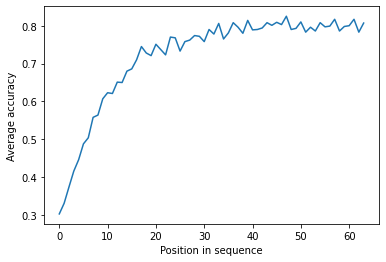

In [26]:
plt.plot(experiment_data[ExperimentDataKey(POSITIONAL=POSITIONAL, NUM_LAYERS=NUM_LAYERS)]["per_position"])
plt.ylabel("Average accuracy")
plt.xlabel("Position in sequence")
plt.show()

# Additional experiments, text generation and visualizations 

## Experiments considering number of layers and positional encodings

Training model with positional encodings: True and number of layers: 0
EPOCH 0 loss:2.2480835914611816 acc:0.2814
EPOCH 1 loss:2.184438424774363 acc:0.2814
EPOCH 2 loss:2.1802688852141174 acc:0.2814
EPOCH 3 loss:2.1783779361579994 acc:0.2814
EPOCH 4 loss:2.1773193244692646 acc:0.2814
EPOCH 5 loss:2.1766974382762667 acc:0.2814
EPOCH 6 loss:2.1763218716730046 acc:0.2814
EPOCH 7 loss:2.17609038232248 acc:0.2814
EPOCH 8 loss:2.1759451944616774 acc:0.2814
EPOCH 9 loss:2.175852633729766 acc:0.2814
Training model with positional encodings: True and number of layers: 1
EPOCH 0 loss:2.1876893254775034 acc:0.2871
EPOCH 1 loss:2.0811721493926227 acc:0.3317
EPOCH 2 loss:1.9916850388804568 acc:0.3396
EPOCH 3 loss:1.95653088786934 acc:0.3473
EPOCH 4 loss:1.9277039509785325 acc:0.3538
EPOCH 5 loss:1.8995127949533583 acc:0.3601
EPOCH 6 loss:1.8735958247245112 acc:0.3638
EPOCH 7 loss:1.8498880727381646 acc:0.3677
EPOCH 8 loss:1.8280058525785614 acc:0.3710
EPOCH 9 loss:1.8065750659266604 acc:0.3737
Trai

,0,1,2,3,4,5
False,0.281438,0.292438,0.609062,0.691219,0.704750,0.709672
True,0.281438,0.373703,0.715266,0.716047,0.717266,0.719047


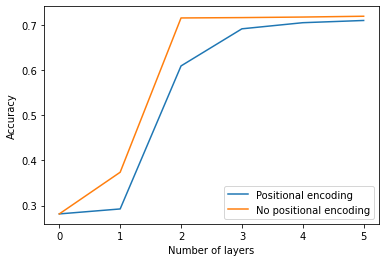

In [27]:
for POSITIONAL in [True, False]:
    for NUM_LAYERS in [0, 1, 2, 3, 4, 5]:
        key = ExperimentDataKey(POSITIONAL=POSITIONAL, NUM_LAYERS=NUM_LAYERS)
        if key in experiment_data:
            continue
        print("Training model with positional encodings:", POSITIONAL, "and number of layers:", NUM_LAYERS)
        models[key] = Decoder(vocab_size=VOCAB_SIZE,
                        d_model=HIDDEN_DIM,
                        d_ff=HIDDEN_FF,
                        num_heads=NUM_HEADS,
                        d_head=HEAD_DIM,
                        num_layers=NUM_LAYERS)
        models[key].to(DEVICE)
        experiment_data[key] = train(models[key], TRAIN_LOADER, TEST_LOADER, 10) # FIXME: 10 epochs

df = pd.DataFrame.from_dict(experiment_data).loc["total"].unstack()
display(df.style.set_caption("Accuracy per POSITIONAL and NUM_LAYERS"))
df.T.plot()
plt.ylabel("Accuracy")
plt.xlabel("Number of layers")
plt.legend(["Positional encoding", "No positional encoding"])
plt.show()

## Text Generation

Use cache to perform efficient text generation. You should generate text token by token. You should consider two choice procedures:
* output the most probable token
* sample from the distribution returned by the model

In [33]:
x = torch.tensor([0]).to(DEVICE)
new_digit = torch.tensor([0]).to(DEVICE)
cache = model.get_empty_cache(1)
for i in range(64):
  dist, cache, _ = model(torch.unsqueeze(new_digit, -1), cache)
  new_digit = take_most_probable(dist)[-1][-1:]
  x = torch.cat([x, new_digit])
print("Generated with cache, naive:", x.tolist())
generated_with_cache = x

Generated with cache, naive: [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2]


In [34]:
x = torch.tensor([0]).to(DEVICE)
for i in range(64):
  dist, _, _ = model(torch.unsqueeze(x, -1), model.get_empty_cache(1))
  new_digit = take_most_probable(dist)[-1][-1:]
  x = torch.cat([x, new_digit])
print("Generated without cache, naive:", x.tolist())
generated_without_cache = x

Generated without cache, naive: [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2]


In [35]:
print("Match:", (generated_with_cache == generated_without_cache).all().item())

Match: True


In [31]:
x = torch.tensor([0]).to(DEVICE)
new_digit = torch.tensor([0]).to(DEVICE)
cache = model.get_empty_cache(1)
for i in range(64):
  dist, cache, _ = model(torch.unsqueeze(new_digit, -1), cache)
  new_digit = take_most_probable(dist)[-1][-1:]
  x = torch.cat([x, new_digit])
print("Generated with cache, sampling:", x.tolist())

Generated with cache, sampling: [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2]


## Attention visualizations (optional)

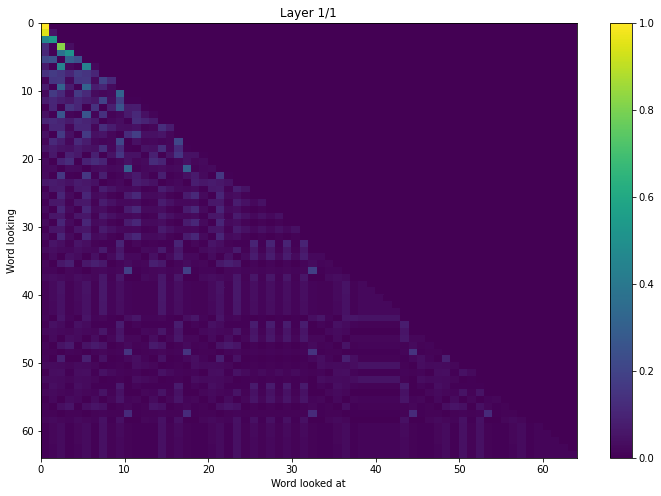

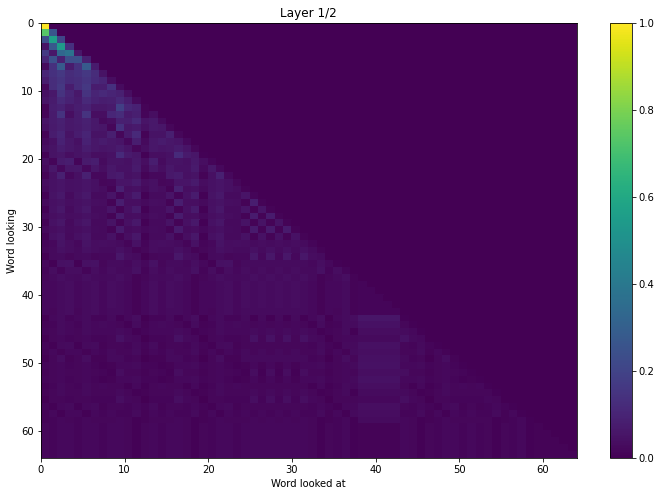

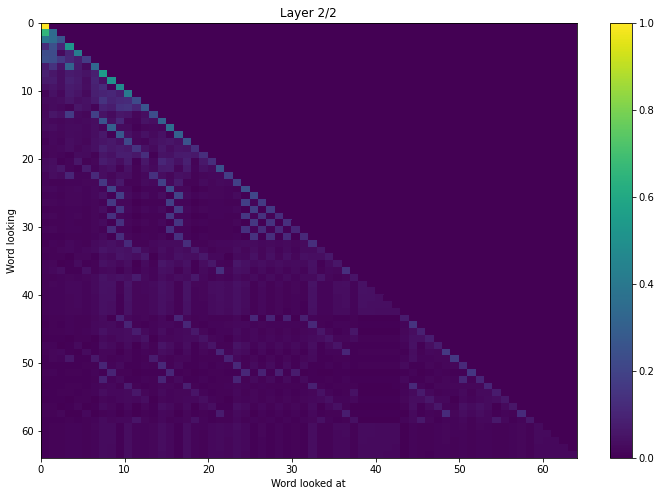

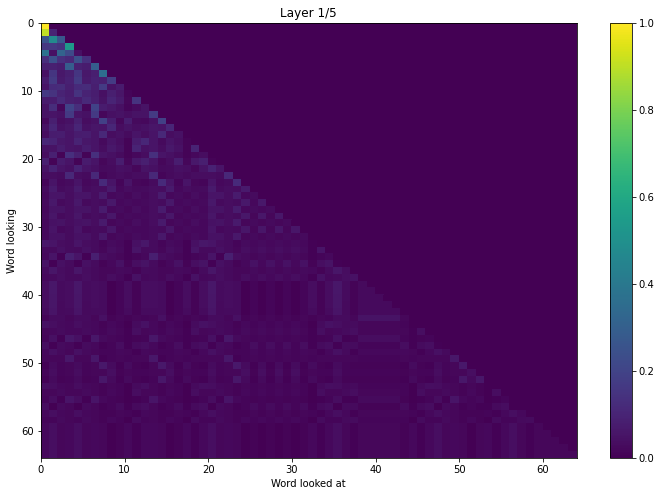

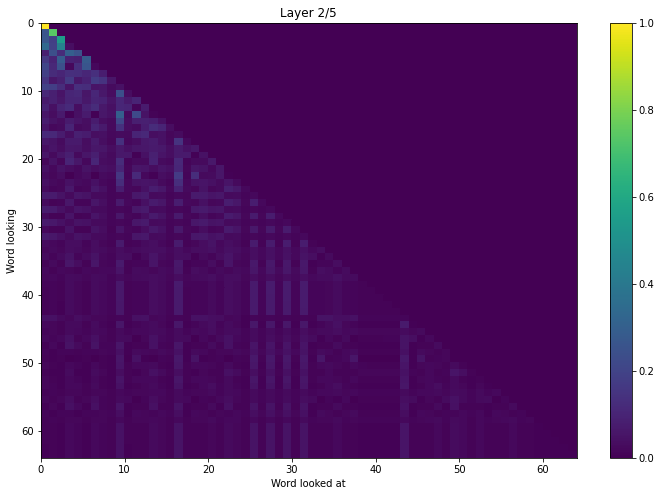

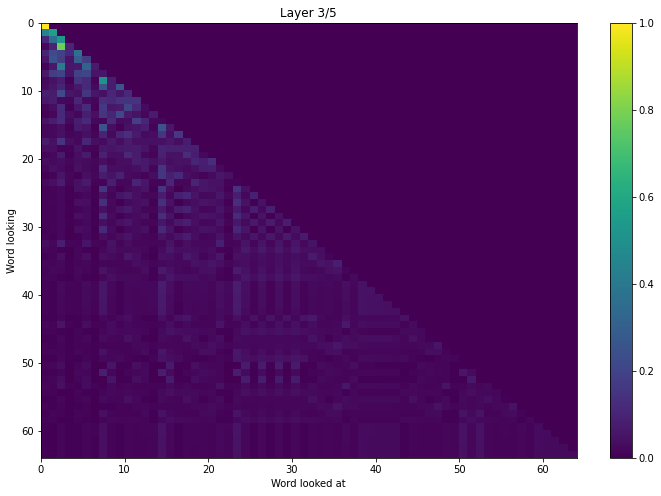

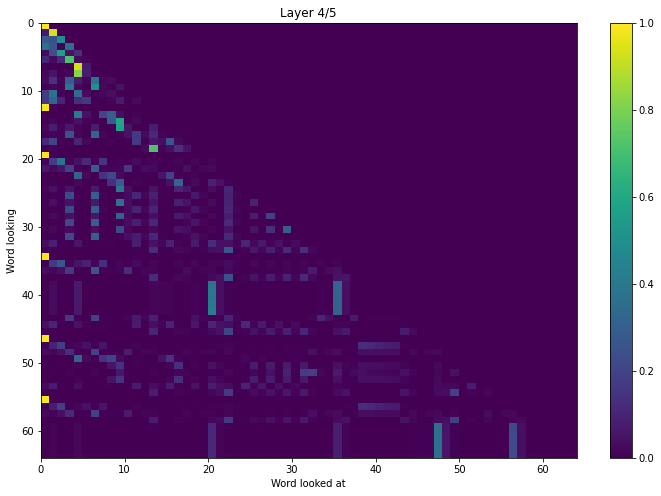

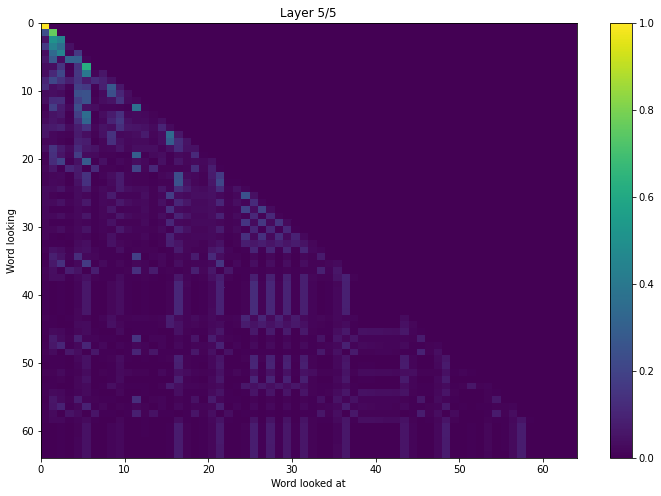

In [32]:
# 0th sequence from the 0th batch from TEST_LOADER
x = next(iter(TEST_LOADER))[0][0].to(DEVICE)

for NUM_LAYERS in [1, 2, 5]:
    model = models[ExperimentDataKey(POSITIONAL=True, NUM_LAYERS=NUM_LAYERS)]
    _, _, all_attention_weights = model(torch.unsqueeze(x, -1), model.get_empty_cache(1))
    for i,attention_weights in enumerate(all_attention_weights):
      plt.figure(figsize=(12,8))
      plt.pcolormesh(attention_weights[:,:,0,0].cpu().detach().numpy(), cmap='viridis')
      plt.xlabel('Word looked at')
      plt.xlim((0, 64))
      plt.ylim((64,0))
      plt.ylabel('Word looking')
      plt.colorbar()
      plt.title(f"Layer {i+1}/{NUM_LAYERS}")
      plt.show()